<a href="https://colab.research.google.com/github/Waiyegolove/Mercy-Mburu-Week-8/blob/main/Mercy_Mburu_DS_Core_Week_8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

### a) Specifying the Question


Nairobi Hospital requires you to make a model that determines whether or not a patient's symptoms indicate that the patient has hypothyroidism.




### b) Defining the Metric for Success

Our project will be considered a success if we can create a model that can predict/classify whether a patient has hypothyroidism or not based on their symptoms.

### c) Understanding the context 

Nairobi Hospital being a healthcare institution that is vital for the well-being of the Kenyan citizens should always ensure that they can increasingly provide higher healthcare standards to potential patients, that includes accurate diagnosis. Misdiagnosis leads to loss of money by patients, let alone the risk to their lives and well-being. Therefore, an accurate model can greatly reduce said risk. This model shouldn't be prescriptive but act as a screen before the doctor comes in. It is imperative that this model is not only accurate but precise.

### d) Recording the Experimental Design

For the project to be a success, the following steps will be followed:

* Read and explore the given dataset.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis and recording your observations.
* Incorporate categorical independent variables into your models.
* Creating our Models
* Provide a recommendation based on your analysis. 
* Challenge your solution by providing insights on how you can make improvements in model improvement.







### e) Data Relevance

This was evaluated against the metric of success (after implementation of solution)

Dataset Columns/Features:

* Age
* Sex
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH
* T3_measured
* T3
* TT4_measured
* TT4
* T4U_measured
* T4U
* FTI_measured
* FTI
* TBG_measured
* TBG





# 2. Reading the Data

In [144]:
# Loading the Dataset

#import necessary libraries for reading data
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [145]:
Thyroid=pd.read_csv('hypothyroid.csv')
Thyroid.head()

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?
2  hypothyroid  24   M            f  ...            y   0            n   ?
3  hypothyroid  24   F            f  ...            y   6            n   ?
4  hypothyroid  77   M            f  ...            y  44            n   ?

[5 rows x 26 columns]

In [146]:
Thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [147]:
Thyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [148]:
Thyroid.head()

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?
2  hypothyroid  24   M            f  ...            y   0            n   ?
3  hypothyroid  24   F            f  ...            y   6            n   ?
4  hypothyroid  77   M            f  ...            y  44            n   ?

[5 rows x 26 columns]

In [149]:
Thyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

# 3. Checking the Data

In [150]:
# Determining the no. of records in our dataset
#
Thyroid.shape

(3163, 26)

In [151]:
# Previewing the top of our dataset
#
Thyroid.head()

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?
2  hypothyroid  24   M            f  ...            y   0            n   ?
3  hypothyroid  24   F            f  ...            y   6            n   ?
4  hypothyroid  77   M            f  ...            y  44            n   ?

[5 rows x 26 columns]

In [152]:
# Previewing the bottom of our dataset
# 
Thyroid.tail()

status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
3158  negative  58   F            f  ...            y   95            n   ?
3159  negative  29   F            f  ...            y   98            n   ?
3160  negative  77   M            f  ...            y  104            n   ?
3161  negative  74   F            f  ...            y  137            n   ?
3162  negative  56   F            t  ...            y  143            n   ?

[5 rows x 26 columns]

In [153]:
# Checking whether each column has an appropriate datatype
#
Thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [154]:
Thyroid.describe()

status   age   sex on_thyroxine  ... FTI_measured   FTI TBG_measured   TBG
count       3163  3163  3163         3163  ...         3163  3163         3163  3163
unique         2    93     3            2  ...            2   281            2    53
top     negative     ?     F            f  ...            y     ?            n     ?
freq        3012   446  2182         2702  ...         2916   247         2903  2903

[4 rows x 26 columns]

## 4. Tidying the Dataset

In [155]:
Thyroid = Thyroid[Thyroid.sex !='?']

In [156]:
Thyroid=Thyroid.replace('?',np.nan)

In [157]:
Thyroid[['age','TSH',	'T3',	'TT4','T4U','FTI','TBG']]=Thyroid[['age','TSH',	'T3',	'TT4','T4U','FTI','TBG']].astype(float)

In [158]:
# Checking for missing data
Thyroid.isnull().sum()

status                          0
age                           390
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           456
T3_measured                     0
T3                            683
TT4_measured                    0
TT4                           244
T4U_measured                    0
T4U                           243
FTI_measured                    0
FTI                           242
TBG_measured                    0
TBG                          2835
dtype: int64

In [159]:
Thyroid['age'].fillna(Thyroid['age'].mean(),inplace=True)

In [160]:
#filling all the unmeasured values with 0.0
Thyroid['TSH'].fillna(0.0,inplace=True)
Thyroid['T3'].fillna(0.0,inplace=True)
Thyroid['TT4'].fillna(0.0,inplace=True)
Thyroid['T4U'].fillna(0.0,inplace=True)
Thyroid['FTI'].fillna(0.0,inplace=True)
Thyroid['TBG'].fillna(0.0,inplace=True)

In [161]:
#Label encode some of the Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Thyroid['sex']=labelencoder.fit_transform(Thyroid['sex'])
Thyroid['on_thyroxine']=labelencoder.fit_transform(Thyroid['on_thyroxine'])
Thyroid['query_on_thyroxine']=labelencoder.fit_transform(Thyroid['query_on_thyroxine'])
Thyroid['on_antithyroid_medication']=labelencoder.fit_transform(Thyroid['on_antithyroid_medication'])
Thyroid['thyroid_surgery']=labelencoder.fit_transform(Thyroid['thyroid_surgery'])
Thyroid['query_hypothyroid']=labelencoder.fit_transform(Thyroid['query_hypothyroid'])
Thyroid['query_hyperthyroid']=labelencoder.fit_transform(Thyroid['query_hyperthyroid'])
Thyroid['pregnant']=labelencoder.fit_transform(Thyroid['pregnant'])
Thyroid['sick']=labelencoder.fit_transform(Thyroid['sick'])
Thyroid['tumor']=labelencoder.fit_transform(Thyroid['tumor'])
Thyroid['lithium']=labelencoder.fit_transform(Thyroid['lithium'])
Thyroid['goitre']=labelencoder.fit_transform(Thyroid['goitre'])
Thyroid['TSH_measured']=labelencoder.fit_transform(Thyroid['TSH_measured'])
Thyroid['T3_measured']=labelencoder.fit_transform(Thyroid['T3_measured'])
Thyroid['TT4_measured']=labelencoder.fit_transform(Thyroid['TT4_measured'])   
Thyroid['T4U_measured']=labelencoder.fit_transform(Thyroid['T4U_measured']) 
Thyroid['FTI_measured']=labelencoder.fit_transform(Thyroid['FTI_measured']) 
Thyroid['TBG_measured']=labelencoder.fit_transform(Thyroid['TBG_measured'])                                                                                                                                                                                              

In [162]:
Thyroid.dtypes

status                        object
age                          float64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
TBG                          float64
dtype: object

In [163]:
# Checking for missing data
Thyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [164]:
#checking for duplicates
Thyroid.duplicated().sum()

77

In [165]:
# Removing duplicates
Thyroid.drop_duplicates(inplace=True)

In [166]:
#checking for duplicates
Thyroid.duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

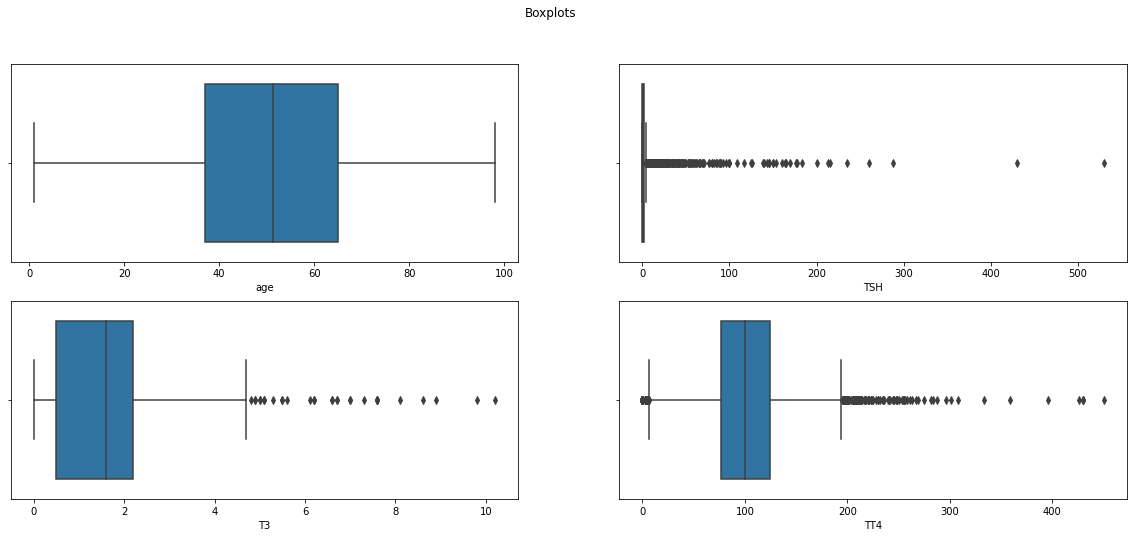

In [167]:
# Checking for outliers
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 8))
fig.suptitle('Boxplots')
sb.boxplot(Thyroid['age'], ax=ax1)
sb.boxplot(Thyroid['TSH'], ax=ax2)
sb.boxplot(Thyroid['T3'], ax=ax3)
sb.boxplot(Thyroid['TT4'], ax=ax4)

# 6. Exploratory Data Analysis

## Univariate Analysis

### Categorical variables

In [168]:
Thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

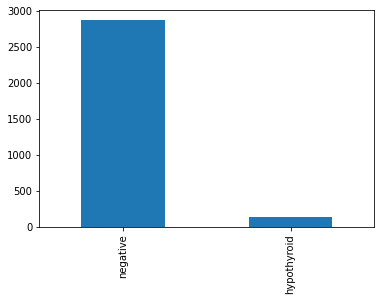

<Figure size 1008x648 with 0 Axes>

In [169]:
Thyroid['status'].value_counts().plot(kind='bar')
fig=plt.figure(figsize=(14,9))
plt.show()

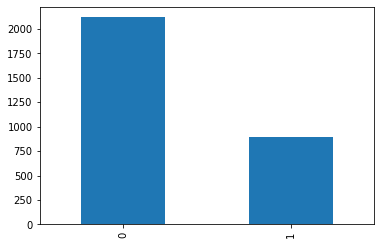

In [170]:
Thyroid['sex'].value_counts().plot(kind='bar')

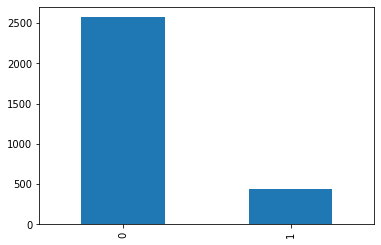

In [171]:
Thyroid['on_thyroxine'].value_counts().plot(kind='bar')

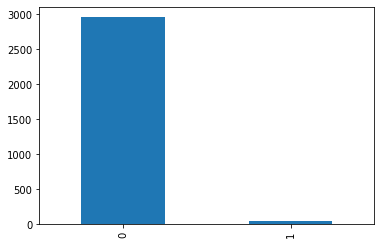

In [172]:
Thyroid['query_on_thyroxine'].value_counts().plot(kind='bar')

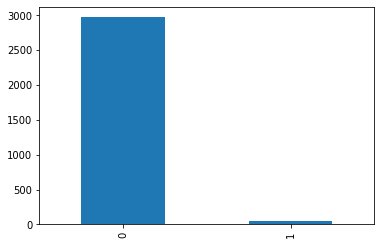

In [173]:
Thyroid['on_antithyroid_medication'].value_counts().plot(kind='bar')

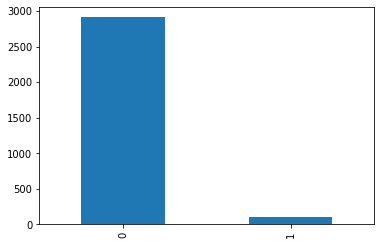

In [174]:
Thyroid['thyroid_surgery'].value_counts().plot(kind='bar')

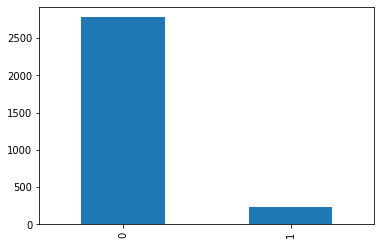

In [175]:
Thyroid['query_hypothyroid'].value_counts().plot(kind='bar')

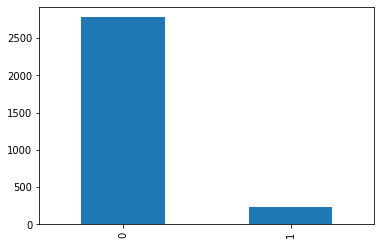

In [176]:
Thyroid['query_hyperthyroid'].value_counts().plot(kind='bar')

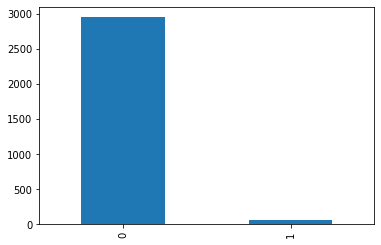

In [177]:
Thyroid['pregnant'].value_counts().plot(kind='bar')

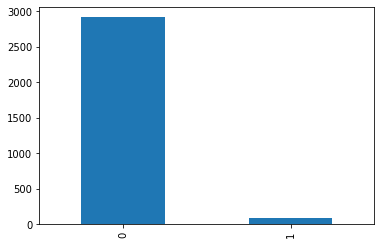

In [178]:
Thyroid['sick'].value_counts().plot(kind='bar')

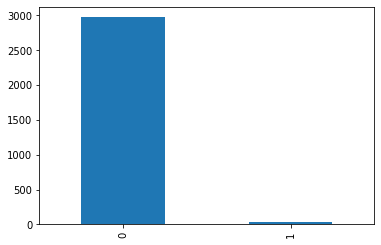

In [179]:
Thyroid['tumor'].value_counts().plot(kind='bar')

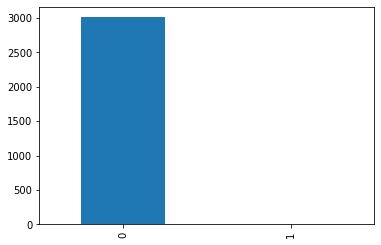

In [180]:
Thyroid['lithium'].value_counts().plot(kind='bar')

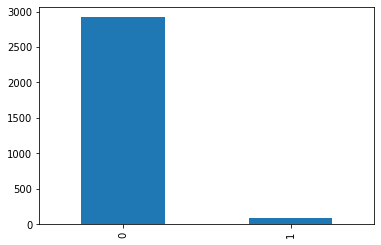

In [181]:
Thyroid['goitre'].value_counts().plot(kind='bar')

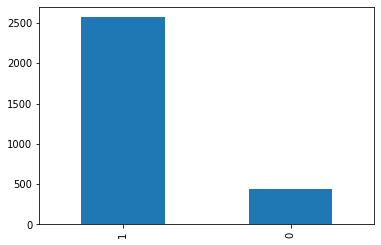

In [182]:
Thyroid['TSH_measured'].value_counts().plot(kind='bar')

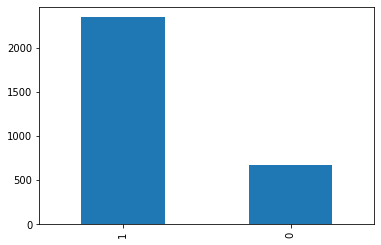

In [183]:
Thyroid['T3_measured'].value_counts().plot(kind='bar')

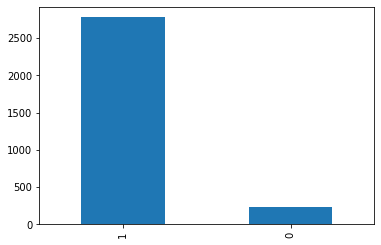

In [184]:
Thyroid['TT4_measured'].value_counts().plot(kind='bar')

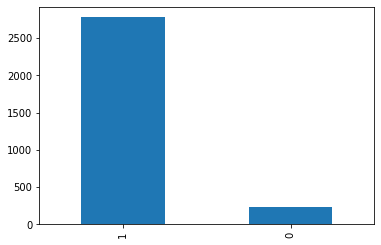

In [185]:
Thyroid['T4U_measured'].value_counts().plot(kind='bar')

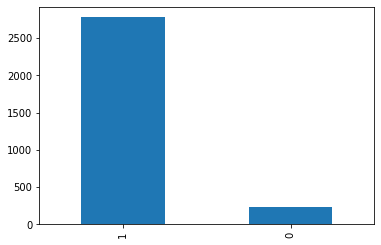

In [186]:
Thyroid['FTI_measured'].value_counts().plot(kind='bar')

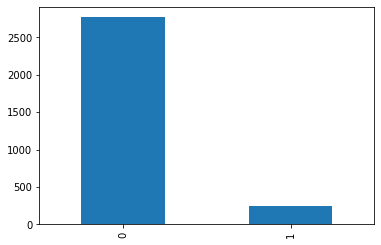

In [187]:
Thyroid['TBG_measured'].value_counts().plot(kind='bar')

### Numerical Variables

#### Measure of Central Tendency


In [188]:
Thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [189]:
#getting the measure of central tendency and Standard deviation together with variance of age
mean = Thyroid["age"].mean()
median = Thyroid["age"].median()
mode = Thyroid["age"].mode()
std = Thyroid["age"].std()
var = Thyroid["age"].var()
max = Thyroid["age"].max()
min = Thyroid["age"].min()
range = max - min
quantile = Thyroid["age"].quantile([0.25,0.5,0.75])
print('The mean of age  is',mean)
print('The median of age is',median)
print('The mode of age is',mode)
print('The standard deviation of age is',std)
print('The variance of age is',var)
print('The Range of age  is',range)
print('The quantile of age is',quantile)

The mean of age  is 51.18487885828091
The median of age is 51.22
The mode of age is 0    51.22
dtype: float64
The standard deviation of age is 18.018955858005345
The variance of age is 324.6827702127451
The Range of age  is 97.0
The quantile of age is 0.25    37.00
0.50    51.22
0.75    65.00
Name: age, dtype: float64


In [190]:
#getting the measure of central tendency and Standard deviation together with variance of TSH
mean = Thyroid["TSH"].mean()
median = Thyroid["TSH"].median()
mode = Thyroid["TSH"].mode()
std = Thyroid["TSH"].std()
var = Thyroid["TSH"].var()
max = Thyroid["TSH"].max()
min = Thyroid["TSH"].min()
range = max - min
quantile = Thyroid["TSH"].quantile([0.25,0.5,0.75])
print('The mean of TSH  is',mean)
print('The median of TSH is',median)
print('The mode of TSH is',mode)
print('The standard deviation TSH of is',std)
print('The variance of TSH is',var)
print('The Range of TSH is',range)
print('The quantile of TSH is',quantile)

The mean of TSH  is 4.96615997344839
The median of TSH is 0.4
The mode of TSH is 0    0.0
dtype: float64
The standard deviation TSH of is 22.519265537362394
The variance of TSH is 507.1173203422375
The Range of TSH is 530.0
The quantile of TSH is 0.25    0.0
0.50    0.4
0.75    1.7
Name: TSH, dtype: float64


In [191]:
#getting the measure of central tendency and Standard deviation together with variance of T3
mean = Thyroid["T3"].mean()
median = Thyroid["T3"].median()
mode = Thyroid["T3"].mode()
std = Thyroid["T3"].std()
var = Thyroid["T3"].var()
max = Thyroid["T3"].max()
min = Thyroid["T3"].min()
range = max - min

quantile = Thyroid["T3"].quantile([0.25,0.5,0.75])
print('The mean of T3 is',mean)
print('The median of T3 is',median)
print('The mode of T3 is',mode)
print('The standard deviation T3 of is',std)
print('The variance of T3 is',var)
print('The Range of T3 is',range)
print('The quantile of T3 is',quantile)

The mean of T3 is 1.4981413873216047
The median of T3 is 1.6
The mode of T3 is 0    0.0
dtype: float64
The standard deviation T3 of is 1.168656706053261
The variance of T3 is 1.3657584966032583
The Range of T3 is 10.2
The quantile of T3 is 0.25    0.5
0.50    1.6
0.75    2.2
Name: T3, dtype: float64


In [192]:
#getting the measure of central tendency and Standard deviation together with variance of TT4
mean = Thyroid["TT4"].mean()
median = Thyroid["TT4"].median()
mode = Thyroid["TT4"].mode()
std = Thyroid["TT4"].std()
var = Thyroid["TT4"].var()
max = Thyroid["TT4"].max()
min = Thyroid["TT4"].min()
range = max - min

quantile = Thyroid["TT4"].quantile([0.25,0.5,0.75])
print('The mean of TT4 is',mean)
print('The median of TT4 is',median)
print('The mode of TT4  is',mode)
print('The standard deviation TT4 of is',std)
print('The variance of TT4 is',var)
print('The Range of TT4 is',range)
print('The quantile of TT4 is',quantile)

The mean of TT4 is 99.8250580816462
The median of TT4 is 100.0
The mode of TT4  is 0    0.0
dtype: float64
The standard deviation TT4 of is 51.44413516814921
The variance of TT4 is 2646.4990431988062
The Range of TT4 is 450.0
The quantile of TT4 is 0.25     77.0
0.50    100.0
0.75    124.0
Name: TT4, dtype: float64


In [193]:
#getting the measure of central tendency and Standard deviation together with variance of TBG
mean = Thyroid["TBG"].mean()
median = Thyroid["TBG"].median()
mode = Thyroid["TBG"].mode()
std = Thyroid["TBG"].std()
var = Thyroid["TBG"].var()
max = Thyroid["TBG"].max()
min = Thyroid["TBG"].min()
range = max - min

quantile = Thyroid["TBG"].quantile([0.25,0.5,0.75])
print('The mean of TBG is',mean)
print('The median of TBG  is',median)
print('The mode of  TBG is',mode)
print('The standard deviation TBG of is',std)
print('The variance of TBG  is',var)
print('The Range of TBG is',range)
print('The quantile of TBG is',quantile)

The mean of TBG is 2.521274477265184
The median of TBG  is 0.0
The mode of  TBG is 0    0.0
dtype: float64
The standard deviation TBG of is 10.030383561515029
The variance of TBG  is 100.60859439111091
The Range of TBG is 122.0
The quantile of TBG is 0.25    0.0
0.50    0.0
0.75    0.0
Name: TBG, dtype: float64


In [194]:
#getting the measure of central tendency and Standard deviation together with variance of T4U
mean = Thyroid["T4U"].mean()
median = Thyroid["T4U"].median()
mode = Thyroid["T4U"].mode()
std = Thyroid["T4U"].std()
var = Thyroid["T4U"].var()
max = Thyroid["T4U"].max()
min = Thyroid["T4U"].min()
range = max - min

quantile = Thyroid["T4U"].quantile([0.25,0.5,0.75])
print('The mean of T4U is',mean)
print('The median of T4U is',median)
print('The mode of T4U  is',mode)
print('The standard deviation  T4U of is',std)
print('The variance of T4U is',var)
print('The Range of T4U is',range)
print('The quantile of T4U is',quantile)

The mean of T4U is 0.9082376369067365
The median of T4U is 0.95
The mode of T4U  is 0    0.0
dtype: float64
The standard deviation  T4U of is 0.3366169978936112
The variance of T4U is 0.11331100327090747
The Range of T4U is 2.21
The quantile of T4U is 0.25    0.83
0.50    0.95
0.75    1.05
Name: T4U, dtype: float64


In [195]:
#getting the measure of central tendency and Standard deviation together with variance of T4U
mean = Thyroid["FTI"].mean()
median = Thyroid["FTI"].median()
mode = Thyroid["FTI"].mode()
std = Thyroid["FTI"].std()
var = Thyroid["FTI"].var()
max = Thyroid["FTI"].max()
min = Thyroid["FTI"].min()
range = max - min

quantile = Thyroid["FTI"].quantile([0.25,0.5,0.75])
print('The mean of FTI is',mean)
print('The median of FTI is',median)
print('The mode of FTI  is',mode)
print('The standard deviation FTI of is',std)
print('The variance of FTI  is',var)
print('The Range of FTI is',range)
print('The quantile of FTI is',quantile)

The mean of FTI is 103.08526385662131
The median of FTI is 104.0
The mode of FTI  is 0    0.0
dtype: float64
The standard deviation FTI of is 50.53116162716006
The variance of FTI  is 2553.398295390173
The Range of FTI is 485.0
The quantile of FTI is 0.25     85.0
0.50    104.0
0.75    125.0
Name: FTI, dtype: float64


#### Kurtosis

In [196]:
kurt1 = Thyroid['age'].kurt()
print("The kurtosis for the age  is: ", kurt1)
if kurt1 > 0:
  print("Leptokurtic")
elif kurt1 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt2 = Thyroid['T3'].kurt()
print("The kurtosis for the T3 is: ", kurt2)
if kurt2 > 0:
  print("Leptokurtic")
elif kurt2 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt3 = Thyroid['TT4'].kurt()
print("The kurtosis for the TT4 is: ", kurt3)
if kurt3 > 0:
  print("Leptokurtic")
elif kurt3 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt4 = Thyroid['T4U'].kurt()
print("The kurtosis for the T4U is: ", kurt4)
if kurt4 > 0:
  print("Leptokurtic")
elif kurt4 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

The kurtosis for the age  is:  -0.6630791897759818
Platykurtic


The kurtosis for the T3 is:  4.442325306260354
Leptokurtic


The kurtosis for the TT4 is:  3.9546199315645434
Leptokurtic


The kurtosis for the T4U is:  2.598154676972858
Leptokurtic




In [197]:
kurt1 = Thyroid['TSH'].kurt()
print("The kurtosis for the TSH  is: ", kurt1)
if kurt1 > 0:
  print("Leptokurtic")
elif kurt1 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt2 = Thyroid['TBG'].kurt()
print("The kurtosis for the TBG is: ", kurt2)
if kurt2 > 0:
  print("Leptokurtic")
elif kurt2 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt3 = Thyroid['FTI'].kurt()
print("The kurtosis for the FTI is: ", kurt3)
if kurt3 > 0:
  print("Leptokurtic")
elif kurt3 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 



The kurtosis for the TSH  is:  175.76282121033503
Leptokurtic


The kurtosis for the TBG is:  46.89234565226632
Leptokurtic


The kurtosis for the FTI is:  4.402103594388915
Leptokurtic




#### Skewness

In [198]:

skew1 = Thyroid['age'].skew()
print("The skewness for the age is: ", skew1)
if skew1 == 0:
  print("The distribution is symmetrical")
elif skew1 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew2 = Thyroid['T3'].skew()
print("The skewness for the T3 is: ", skew2)
if skew2 == 0:
  print("The distribution is symmetrical")
elif skew2 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew3 = Thyroid['TT4'].skew()
print("The skewness for the TT4 is: ", skew3)
if skew3 == 0:
  print("The distribution is symmetrical")
elif skew3 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew4 = Thyroid['T4U'].skew()
print("The skewness for the T4U is: ", skew4)
if skew4 == 0:
  print("The distribution is symmetrical")
elif skew4 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness for the age is:  -0.1867084208828361
The distribution is negatively skewed


The skewness for the T3 is:  1.0888077233737727
The distribution is positively skewed


The skewness for the TT4 is:  0.6440373606809809
The distribution is positively skewed


The skewness for the T4U is:  -0.936460000775191
The distribution is negatively skewed




In [199]:
# Skewness
skew1 = Thyroid['FTI'].skew()
print("The skewness for the FTI is: ", skew1)
if skew1 == 0:
  print("The distribution is symmetrical")
elif skew1 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew2 = Thyroid['TBG'].skew()
print("The skewness for the TBG is: ", skew2)
if skew2 == 0:
  print("The distribution is symmetrical")
elif skew2 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew3 = Thyroid['TSH'].skew()
print("The skewness for the TSH is: ", skew3)
if skew3 == 0:
  print("The distribution is symmetrical")
elif skew3 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')



The skewness for the FTI is:  0.5203080847269788
The distribution is positively skewed


The skewness for the TBG is:  5.863620391726905
The distribution is positively skewed


The skewness for the TSH is:  11.017626121743522
The distribution is positively skewed




In [200]:
# Ploting the univariate summaries and recording our observations
#
# installing pandas profiling
! pip install -U pandas-profiling


Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.7/dist-packages (3.0.0)


In [201]:
# Generating the profile report on the thyroid_surgery dataset
from pandas_profiling import ProfileReport
profile = ProfileReport(Thyroid)


In [202]:
profile

Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Bivariate Analysis

In [203]:
Correlation=Thyroid.corr()
Correlation

age       sex  ...  TBG_measured       TBG
age                        1.000000  0.006310  ...     -0.128066 -0.130936
sex                        0.006310  1.000000  ...     -0.092845 -0.099399
on_thyroxine               0.001417 -0.123022  ...     -0.061743 -0.057186
query_on_thyroxine        -0.020255  0.052540  ...     -0.040658 -0.034281
on_antithyroid_medication -0.060095 -0.021454  ...      0.047255  0.034186
thyroid_surgery           -0.013206 -0.044273  ...     -0.008392 -0.017586
query_hypothyroid          0.044719 -0.066322  ...     -0.041235 -0.041260
query_hyperthyroid        -0.086305 -0.056790  ...      0.104835  0.092653
pregnant                  -0.160011 -0.092586  ...      0.000878  0.050155
sick                       0.065522  0.022816  ...     -0.033388 -0.026200
tumor                     -0.064341 -0.005514  ...     -0.023996 -0.020776
lithium                   -0.021723 -0.016740  ...     -0.007685 -0.006479
goitre                    -0.037346 -0.092252  ...      0.091861  0.075467
TSH_measured               0.202780  0.033738  ...     -0.701058 -0.585537
TSH                        0.011516 -0.032145  ...     -0.059403 -0.050292
T3_measured                0.178768  0.101804  ...     -0.544069 -0.453991
T3                        -0.076523  0.018381  ...     -0.373480 -0.303113
TT4_measured               0.125522  0.091380  ...     -0.966410 -0.815106
TT4                       -0.001961 -0.086388  ...     -0.542120 -0.444659
T4U_measured               0.123139  0.090754  ...     -0.968668 -0.817011
T4U                       -0.027215 -0.072025  ...     -0.754792 -0.626725
FTI_measured               0.123713  0.092845  ...     -0.970940 -0.818927
FTI                        0.095593  0.014111  ...     -0.574742 -0.484208
TBG_measured              -0.128066 -0.092845  ...      1.000000  0.843163
TBG                       -0.130936 -0.099399  ...      0.843163  1.000000

[25 rows x 25 columns]

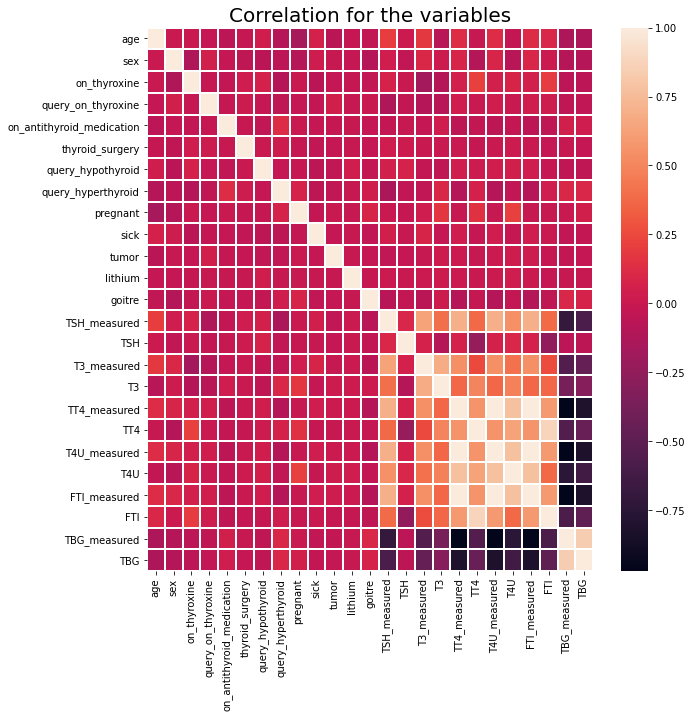

In [204]:
plt.figure(figsize=(10,10))
sb.heatmap(Correlation,xticklabels=Correlation.columns,yticklabels=Correlation.columns,linewidth=1.0,annot=False)
plt.title('Correlation for the variables',fontsize=20)
plt.show()

There is high correlation among the last 12 Variables so we visualize their correlation matrix separately.

In [205]:
#correlation matrix
correlations=Thyroid.iloc[: , -12:]
correlations

TSH_measured    TSH  T3_measured  ...    FTI  TBG_measured  TBG
0                1   30.0            1  ...   10.0             0  0.0
1                1  145.0            1  ...   17.0             0  0.0
2                1    0.0            1  ...    0.0             0  0.0
3                1  430.0            1  ...    6.0             0  0.0
4                1    7.3            1  ...   44.0             0  0.0
...            ...    ...          ...  ...    ...           ...  ...
3158             1    5.8            1  ...   95.0             0  0.0
3159             1    0.8            1  ...   98.0             0  0.0
3160             1    1.2            1  ...  104.0             0  0.0
3161             1    1.3            1  ...  137.0             0  0.0
3162             1    0.0            1  ...  143.0             0  0.0

[3013 rows x 12 columns]

In [206]:
correlations= correlations.corr()
correlations

TSH_measured       TSH  ...  TBG_measured       TBG
TSH_measured      1.000000  0.091574  ...     -0.701058 -0.585537
TSH               0.091574  1.000000  ...     -0.059403 -0.050292
T3_measured       0.631240  0.062356  ...     -0.544069 -0.453991
T3                0.402384 -0.088855  ...     -0.373480 -0.303113
TT4_measured      0.697044  0.064151  ...     -0.966410 -0.815106
TT4               0.381225 -0.225530  ...     -0.542120 -0.444659
T4U_measured      0.695420  0.064003  ...     -0.968668 -0.817011
T4U               0.547651  0.098502  ...     -0.754792 -0.626725
FTI_measured      0.693792  0.063855  ...     -0.970940 -0.818927
FTI               0.387469 -0.247392  ...     -0.574742 -0.484208
TBG_measured     -0.701058 -0.059403  ...      1.000000  0.843163
TBG              -0.585537 -0.050292  ...      0.843163  1.000000

[12 rows x 12 columns]

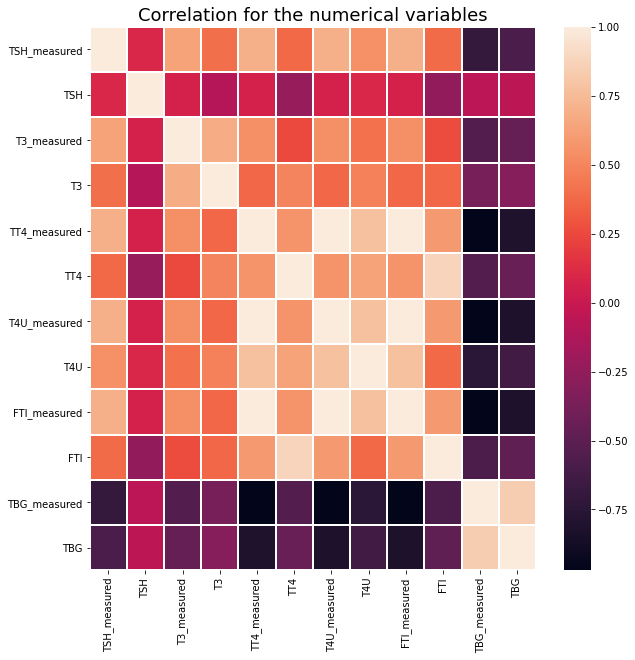

In [207]:
plt.figure(figsize=(10,10))
sb.heatmap(correlations,xticklabels=correlations.columns,yticklabels=correlations.columns,linewidth=1.0,annot=False)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

## Multivariate Analysis

In [208]:
# Separating our target label (type) from the other features
feat = Thyroid.drop('status',axis=1)
status_label = Thyroid['status']
# Subject our features to LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(feat, status_label)
lda_feat = lda.transform(feat)
#lda coefficients
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
Important_features = pd.DataFrame(index=feat.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)

0
T4U_measured               9.531830
lithium                    3.835557
tumor                      1.244368
sick                       1.112887
on_antithyroid_medication  1.036228
pregnant                   0.953955
query_on_thyroxine         0.729406
sex                        0.140347
T3                         0.136701
TT4                        0.065703
age                       -0.008660
TBG                       -0.008957
FTI                       -0.011684
query_hypothyroid         -0.051297
TSH                       -0.177388
on_thyroxine              -0.272240
T3_measured               -0.335900
goitre                    -0.689793
TSH_measured              -0.762884
query_hyperthyroid        -0.907767
thyroid_surgery           -1.259316
TBG_measured              -6.657086
FTI_measured              -7.329414
T4U                       -7.347428
TT4_measured              -7.994144

## 7. Implementing the Solution

# Random Forest Classifier

In [209]:
Thyroid['status']=labelencoder.fit_transform(Thyroid['status'])

In [210]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
y = Thyroid['status'].values
test_features = Thyroid.columns.to_list()
test_features.remove('status')
X = Thyroid[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [211]:
#Import the model
from sklearn.ensemble import RandomForestClassifier
 #Train the model
forest = RandomForestClassifier(n_estimators=300,min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.988391376451078


In [212]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9913941480206541
Recall: 0.9965397923875432


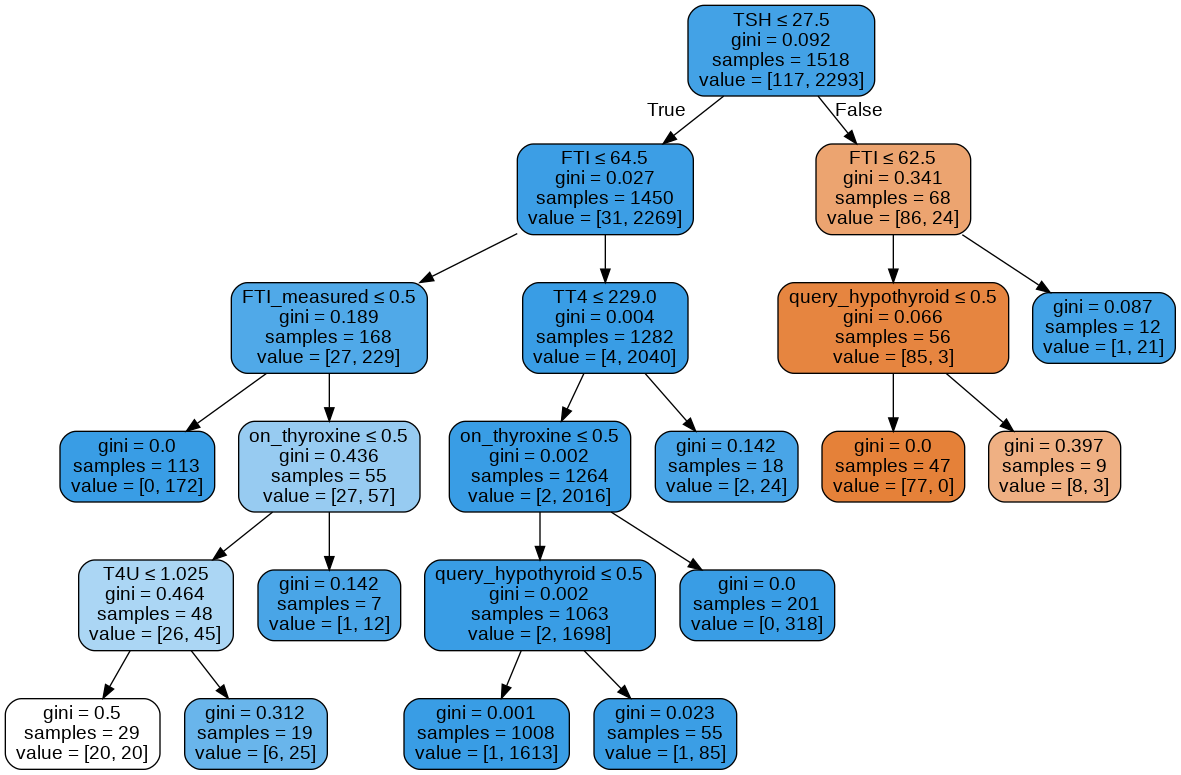

In [213]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[60]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_forest.png')
Image(graph.create_png())

##### Hyperparameter Tuning

In [214]:
from sklearn.model_selection import GridSearchCV
parameters={'min_samples_split': np.linspace(0.1, 1, 10, endpoint=True),
            'max_depth' : np.arange(1, 10, 1)}
forest_grid = GridSearchCV(estimator=forest,param_grid=parameters,n_jobs=1,refit=True,cv=10 )
forest_grid = forest_grid.fit(X_train, y_train)
print("Random forest best parameters:", forest_grid.best_params_)

Random forest best parameters: {'max_depth': 6, 'min_samples_split': 0.1}


In [215]:
#Train the model using the new parameters
forest_grid= RandomForestClassifier(n_estimators=300,min_samples_split = 0.1, max_depth=6)
forest_grid = forest_grid.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_grid = forest_grid.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_grid))

Accuracy: 0.9817578772802653


## Gradient Boost Classifier

In [216]:
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

In [217]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbc))

Accuracy: 0.9900497512437811


##### Hyperparameter Tuning

In [218]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":np.arange(100,500,100),
    "max_depth":np.arange(0.1,10,1),
    "learning_rate":np.arange(0.1,1,1)
    }
cv = GridSearchCV(gbc,parameters,cv=10)
GBC_Tuned = cv.fit(X_train, y_train)
print("Gradient Boost best parameters:", GBC_Tuned.best_params_)

Gradient Boost best parameters: {'learning_rate': 0.1, 'max_depth': 1.1, 'n_estimators': 400}


In [219]:
GBC_Tuned = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, max_depth=1.1)
GBC_Tuned = gbc.fit(X_train, y_train)
y_pred_tuned = GBC_Tuned.predict(X_test)

In [220]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tuned))

Accuracy: 0.9900497512437811


In [221]:
# Get numerical feature importances
importances = list(GBC_Tuned.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances)
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.02), ('sex', 0.0), ('on_thyroxine', 0.01), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.01), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.58), ('T3_measured', 0.0), ('T3', 0.01), ('TT4_measured', 0.0), ('TT4', 0.02), ('T4U_measured', 0.0), ('T4U', 0.01), ('FTI_measured', 0.0), ('FTI', 0.33), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.58
Variable: FTI                  Importance: 0.33
Variable: age                  Importance: 0.02
Variable: TT4                  Importance: 0.02
Variable: on_thyroxine         Importance: 0.01
Variable: on_antithyroid_medication Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Var

We use the Gradient Boost hyperparameter tuned model since it has been cross-validated hence minimal chances of overfitting. The Model has a high accuracy score of 99% hence is okay. The most important Features in this model are the FTI and TSH.

## Support Vector Classifier

In [222]:
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


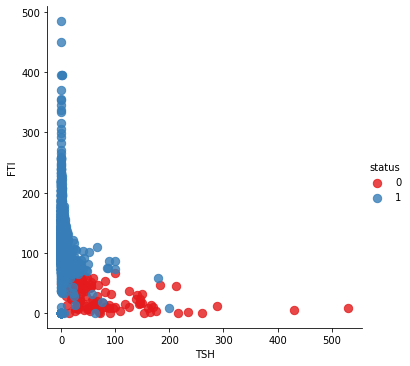

In [223]:
# Plotting our desired Xures
sb.lmplot('TSH','FTI', data=Thyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [224]:
# Specify the input for the model

TSH_FTI = Thyroid[['TSH','FTI']].values

type_label = (Thyroid['status'])


# Fit the model
model = SVC(kernel= 'linear')
model.fit(TSH_FTI, type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


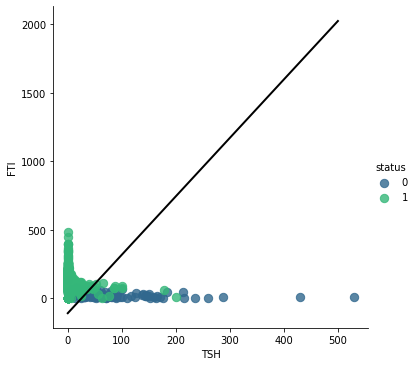

In [225]:
# Get the separating hyperplane
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane
xx = np.linspace(0.0,500)
yy = a * xx - (model.intercept_[0]) / w[1]
# Plot the hyperplane
sb.lmplot('TSH','FTI', data=Thyroid, hue='status', palette='viridis', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [226]:
w = model.coef_[0]
w

array([-0.03887588,  0.00910451])

In [227]:
a = -w[0] / w[1]
a

4.269959806053619

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


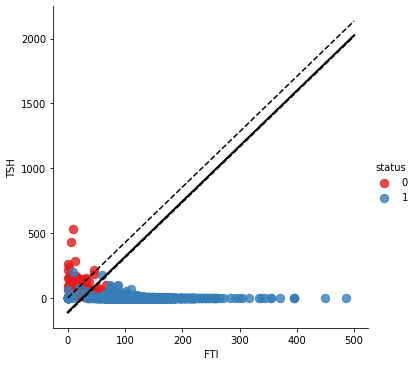

In [228]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sb.lmplot('FTI','TSH', data=Thyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') #'k--' indicates that we want to draw a black dotted line
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=80, facecolors='none');

This model is not suitable for our model since the hyperplane developed is not optimal.

## Polynomial SVC

In [229]:
# Implementing the Solution
# 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC,LinearSVC
model2 = SVC(kernel="poly", degree=3, coef0=1, C=5)


In [230]:
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [231]:
print('Polynomial Accuracy Score:', accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

Polynomial Accuracy Score: 0.9834162520729685
[[ 19   6]
 [  4 574]]


## Radial Basis Function

In [232]:
# Building the model 
Model3 = SVC(kernel='rbf')
# Training the model using the training set
Model3.fit(X_train, y_train)
y_pred3= Model3.predict(X_test)

In [233]:
# Model Evaluation
print('RBF Accuracy Score:',accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

RBF Accuracy Score: 0.9834162520729685
[[ 18   7]
 [  3 575]]


I chose the RBF model because it is highly performing with an accuracy of 98% and gives a less number of false negatives.

##### Hyperparameter tuning

In [234]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
RBF_grid= grid.fit(X_train,y_train)
print("RBF best parameters:", RBF_grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.954, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.952, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.952, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.952, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.952, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.954, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.952, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.952, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.952, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   21.7s finished


In [235]:
Model4 = SVC(C=1000,kernel='rbf',gamma=0.0001)
# Training the model using the training set
Model4.fit(X_train, y_train)
y_pred4= Model4.predict(X_test)

In [236]:
# Model Evaluation
print('RBF Accuracy Score:',accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

RBF Accuracy Score: 0.9900497512437811
[[ 22   3]
 [  3 575]]


 Hyperparameter tuning has improved the accuracy of the model a bit up to 99%.

## 8. Challenging the solution


* Our model's performance could be improved by increasing the number of observations used to train and test it.
* We could also eliminate the number of unknowns in the data to get a better average performance as we may have filled the missing values wrongly.






## 9. Follow up questions

### a). Did we have the right data?

Yes, we had the right Data because the relevant independent variables have a high accuracy in predicting our dependent variable

### b). Do we need other data to answer our question?

Yes, we need more Data especially where the data contained questiion marks prompting us to fill in the missing values.

### c). Did we have the right question?

Yes, we have the right question.